# Data Exploration

## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

: 

In [2]:
lin_full = pd.read_csv('../../data/processed/bern/augmented_full/flipped/processed_tables/linear_interp/processed_table.csv')
lin_part = pd.read_csv('../../data/processed/bern/augmented_part/flipped/processed_tables/linear_interp/processed_table.csv')
step_full = pd.read_csv('../../data/processed/bern/augmented_full/flipped/processed_tables/step_interp/processed_table.csv')
step_part = pd.read_csv('../../data/processed/bern/augmented_part/flipped/processed_tables/step_interp/processed_table.csv')
mapping = pd.read_csv('../../data/processed/bern/mapping/flipped/processed_tables/no_interp/processed_table.csv')

In [3]:
print(lin_full.shape)
print(lin_part.shape)
print(step_full.shape)
print(step_part.shape)
print(mapping.shape)

(7425, 9)
(3570, 9)
(7425, 9)
(3570, 9)
(660, 9)


In [4]:
mapping

,centerID,patientID,hemisphere,contactID,relativeImprovement,amplitude,efficiency,filename,mapping
0,1,1,left,8,0.5,2.5,0.200000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
1,1,1,left,9,1.0,2.5,0.400000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
2,1,1,left,10,1.0,3.5,0.285714,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
3,1,1,left,11,1.0,3.0,0.333333,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
4,1,1,left,12,1.0,2.5,0.400000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
...,...,...,...,...,...,...,...,...,...
655,1,183,right,3,1.0,1.5,0.666667,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
656,1,183,right,4,1.0,1.5,0.666667,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
657,1,183,right,6,1.0,1.0,1.000000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
658,1,183,left,18,1.0,2.0,0.500000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1


## Mapping : Contacts per patient

In [5]:
levels = (0, 16, 17, 7, 8, 18, 19, 15)
contacts = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)
contact_to_levels = {
    0 : '0R',
    16 : '1R',
    17 : '2R',
    7 : '3R',
    8 : '0L',
    18 : '1L',
    19 : '2L',
    15 : '3L'}
contact_to_side = {
    0 : '0R',
    1 : '1R',
    2 : '2R',
    3 : '3R',
    4 : '4R',
    5 : '5R',
    6 : '6R',
    7 : '7R'}
df_levels = mapping.drop(mapping[~mapping['contactID'].isin(levels)].index)
df_levels['contactID'] = df_levels['contactID'].map(contact_to_levels).astype(int)
df_levels = df_levels.rename(columns={'contactID' : 'level'})
df_contacts = mapping.drop(mapping[~mapping['contactID'].isin(contacts)].index)
df_contacts = df_contacts.rename(columns={'contactID' : 'contact'})

ValueError: invalid literal for int() with base 10: '0L'

In [ ]:
df = df_contacts.groupby(['patientID', 'contact']).size().reset_index()
df = pd.melt(df, id_vars=['patientID'], value_vars=['contact']).drop(columns=('variable'))
df = pd.get_dummies(df.value)
df['patientID'] = df_contacts.loc[:, 'patientID'].reset_index()['patientID']
df['patientID'] = df['patientID'].astype(int)
df = df.groupby('patientID').sum().reset_index()
df

,patientID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,8,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1
4,9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,11,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1
6,12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,14,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
9,15,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1


In [100]:
df.to_csv('mapping_contacts.csv', index=False)

In [112]:
df = df_contacts.groupby(['patientID'])['contact'].apply(list).reset_index(name='unique_contacts')
df

,patientID,unique_contacts
0,1,"[8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, ..."
1,3,"[8, 9, 10, 11, 12, 13, 14, 15]"
2,6,"[8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, ..."
3,8,"[9, 10, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 7]"
4,9,"[8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, ..."
5,11,"[9, 12, 13, 14, 15, 4, 5, 6, 7]"
6,12,"[8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, ..."
7,13,"[8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, ..."
8,14,"[9, 10, 11, 12, 13, 14, 15]"
9,15,"[9, 10, 11, 12, 13, 14, 15, 0, 2, 4, 6, 7]"


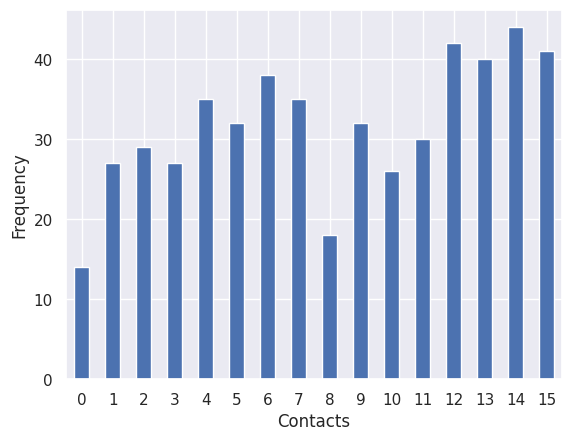

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df_contacts.contact.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Contacts')
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.show()

In [105]:
df = df_levels.groupby(['patientID', 'level']).size().reset_index()
df = pd.melt(df, id_vars=['patientID'], value_vars=['level']).drop(columns=('variable'))
df = pd.get_dummies(df.value)
df['patientID'] = df_levels.loc[:, 'patientID'].reset_index()['patientID']
df['patientID'] = df['patientID'].astype(int)
df = df.groupby('patientID').sum().reset_index()
df

,patientID,0,1,2,3,4,5,6,7
0,1,1,1,1,1,1,1,1,1
1,3,0,0,0,0,1,1,1,1
2,6,1,1,1,1,1,1,1,1
3,8,0,1,1,1,0,1,1,1
4,9,1,1,1,1,1,1,1,1
5,11,0,0,1,1,0,1,1,1
6,12,1,1,1,1,1,1,1,1
7,13,1,1,1,1,1,1,1,1
8,14,0,0,0,0,0,1,1,1
9,15,1,1,1,1,0,1,1,1


In [106]:
df.to_csv('mapping_levels.csv', index=False)

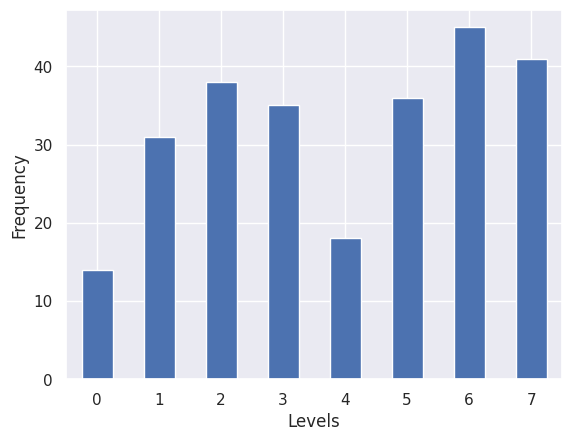

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df_levels.level.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Levels')
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.show()

## Exploring clinical scores

In [10]:
from scipy import stats
y = mapping['relativeImprovement']

print(stats.describe(y))

DescribeResult(nobs=660, minmax=(0.25, 1.0), mean=0.9131313148484848, variance=0.035689724354725914, skewness=-1.9565551111234987, kurtosis=2.457459091528751)


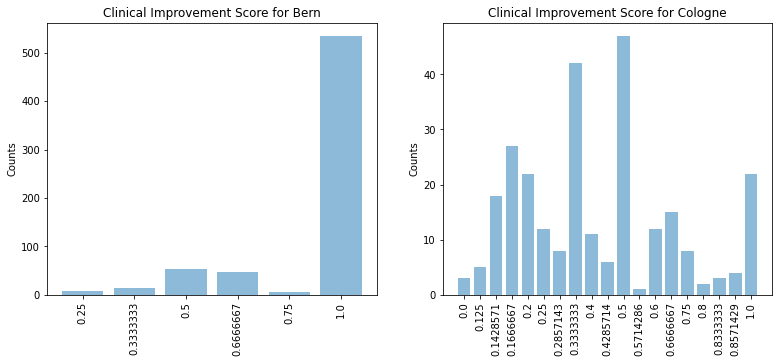

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(13,5))

y_bern = table[table['centerID'] == 'Bern']['clinicalScore']
y_koln = table[table['centerID'] == 'Cologne']['clinicalScore']

unique, counts = np.unique(y_bern, return_counts=True)
y_pos = np.arange(len(unique))

ax[0].bar(y_pos, counts, align='center', alpha=0.5)
ax[0].set_xticks(y_pos, unique, rotation = 'vertical')
ax[0].set_ylabel('Counts')
ax[0].set_title('Clinical Improvement Score for Bern')

unique, counts = np.unique(y_koln, return_counts=True)
y_pos = np.arange(len(unique))

ax[1].bar(y_pos, counts, align='center', alpha=0.5)
ax[1].set_xticks(y_pos, unique, rotation = 'vertical')
ax[1].set_ylabel('Counts')
ax[1].set_title('Clinical Improvement Score for Cologne')

plt.show()

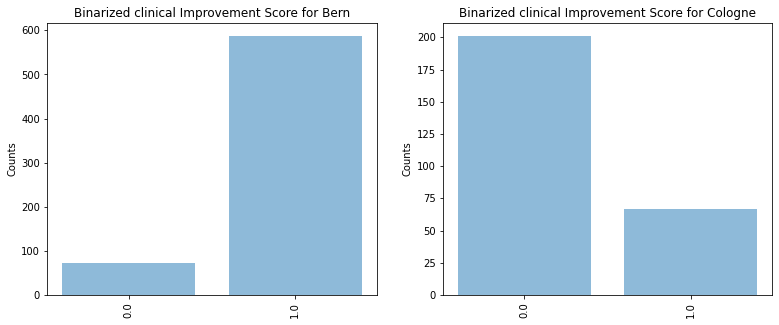

In [18]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(13,5))

y_bern_bin = table[table['centerID'] == 'Bern']['clinicalScore'].apply(lambda x : np.around(x))
y_koln_bin = table[table['centerID'] == 'Cologne']['clinicalScore'].apply(lambda x : np.around(x))

bern_unique, bern_counts = np.unique(y_bern_bin, return_counts=True)
y_pos = np.arange(len(unique))

ax[0].bar(y_pos, bern_counts, align='center', alpha=0.5)
ax[0].set_xticks(y_pos, bern_unique, rotation = 'vertical')
ax[0].set_ylabel('Counts')
ax[0].set_title('Binarized clinical Improvement Score for Bern')

koln_unique, koln_counts = np.unique(y_koln_bin, return_counts=True)
y_pos = np.arange(len(unique))

ax[1].bar(y_pos, koln_counts, align='center', alpha=0.5)
ax[1].set_xticks(y_pos, koln_unique, rotation = 'vertical')
ax[1].set_ylabel('Counts')
ax[1].set_title('Binarized clinical Improvement Score for Cologne')

plt.show()

plt.show()

In [23]:
bin_imshow = np.array([bern_counts, koln_counts])
bin_imshow

array([[ 73, 587],
       [201,  67]])

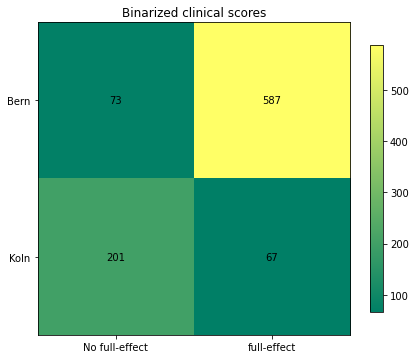

In [51]:
fig, ax = plt.subplots(figsize = (7, 7))

pos = ax.imshow(bin_imshow, cmap = 'summer')
ax.set_title('Binarized clinical scores')
ax.set_yticks([0, 1], ['Bern', 'Koln'])
ax.set_xticks([0, 1], ['No full-effect', 'full-effect'])
fig.colorbar(pos, ax=ax, shrink = 0.7)
for (j,i),label in np.ndenumerate(bin_imshow):
    ax.text(i,j,label,ha='center',va='center', color = 'black')

Bern dataset is biased towards full-effect whereas Koln dataset is biased towards partial-effect.

In [ ]:
table[table['']]

In [17]:
table.groupby('centerID')['clinicalScore'].mean()

centerID
Bern       0.913131
Cologne    0.429678
Name: clinicalScore, dtype: float64

In [18]:
table[['clinicalScore', 'amplitude', 'efficiency']].describe()

,clinicalScore,amplitude,efficiency
count,928.000000,928.000000,928.000000
mean,0.773513,3.202856,0.281478
std,0.303632,1.247003,0.171527
min,0.000000,1.000000,0.000000
25%,0.500000,2.500000,0.152885
50%,1.000000,3.000000,0.250000
75%,1.000000,4.000000,0.400000
max,1.000000,8.000000,1.000000


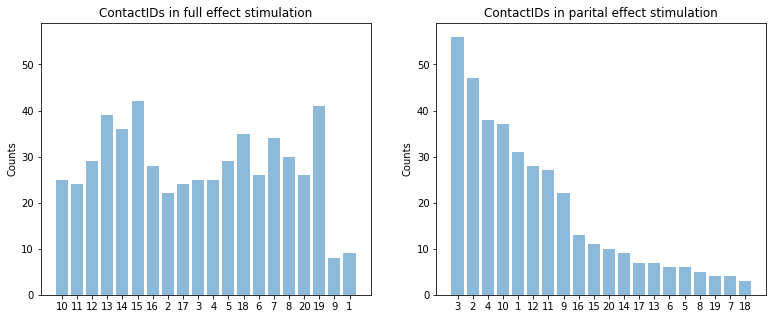

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

contact_id_count_fe = table['contactID'].where(table['clinicalScore'] == 1.).value_counts(sort=False)
y_pos = np.arange(len(contact_id_count_fe))

ax[0].bar(y_pos, contact_id_count_fe.values, align='center', alpha=0.5)
ax[0].set_xticks(y_pos, [int(i)+1 for i in contact_id_count_fe.index])
ax[0].set_ylabel('Counts')
ax[0].set_title('ContactIDs in full effect stimulation')


contact_id_count_pe = table['contactID'].where(table['clinicalScore'] != 1.).value_counts()
y_pos = np.arange(len(contact_id_count_pe))

ax[1].bar(y_pos, contact_id_count_pe.values, align='center', alpha=0.5)
ax[1].set_xticks(y_pos, [int(i)+1 for i in contact_id_count_pe.index])
ax[1].set_ylabel('Counts')
ax[1].set_title('ContactIDs in parital effect stimulation')

custom_ylim = (0, np.max([contact_id_count_pe.max(),contact_id_count_fe.max()])+3)

# Setting the values for all axes.
plt.setp(ax, ylim=custom_ylim)

plt.show()

In [20]:
# leadID is = patient number + hemisphere for .0/.5 values
table.groupby(['centerID'])['patientID'].nunique()

centerID
Bern       46
Cologne    28
Name: patientID, dtype: int64

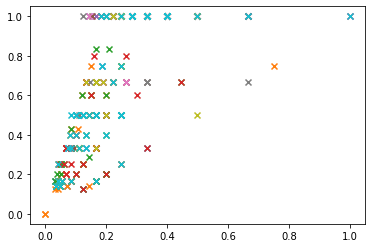

In [21]:
# make colormap per contact, smaller points
fig, ax = plt.subplots()
left = table['contactID'] < 10

for contact in range(10):
    ax.scatter(table.where(table['contactID'] == contact)['efficiency'],
                table.where(table['contactID'] == contact)['clinicalScore'], marker = 'x')
#ax.scatter(table.where(table['contactID'] >= 10)['efficiency'],table.where(table['contactID'] >= 10)['clinicalScore'], marker = '.')
plt.show()

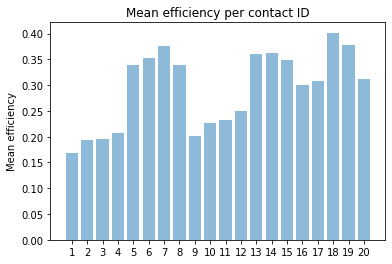

In [22]:
mean_efficiencies = table.groupby(['contactID'])['efficiency'].mean()
y_pos = np.arange(len(mean_efficiencies))

plt.bar(y_pos, mean_efficiencies.values, align='center', alpha=0.5)
plt.xticks(y_pos, mean_efficiencies.index+1)
plt.ylabel('Mean efficiency')
plt.title('Mean efficiency per contact ID')

plt.show()

## Amplitudes

<AxesSubplot:>

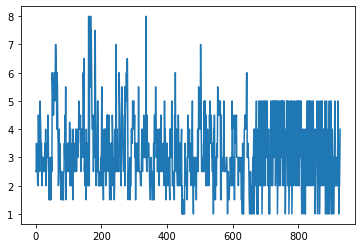

In [6]:
table['amplitude'].plot()

In [4]:
print(table[table['amplitude'] > 5.0]['patientID'].unique())
print(len(table[table['amplitude'] > 5.0]['patientID'].unique()))

NameError: name 'table' is not defined

In [11]:
table[table['amplitude'] > 5.0][['patientID', 'hemisphere']]

,patientID,hemisphere
50,8,left
51,8,left
55,8,left
56,8,right
57,8,right
59,8,right
60,8,right
61,8,right
62,8,right
63,8,right


## Cheking amplitude/score linearity in Koln dataset

In [18]:
table[table['centerID'] == 'Cologne']['patientID'].unique()

array([201, 202, 203, 204, 205, 206, 207, 208, 211, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 231, 233, 235, 237, 238,
       239, 240])

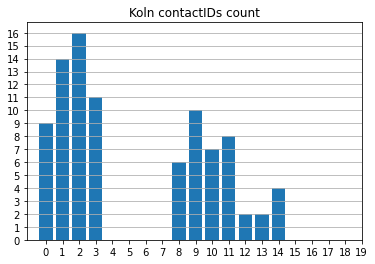

In [46]:
from collections import Counter
import matplotlib.pyplot as plt

# print unique list of contactIDs per patient in Cologne
contacts_per_patient = table[table['centerID'] == 'Cologne'].groupby(['patientID'])['contactID'].unique().to_list()

collpased_list = [x for y in contacts_per_patient for x in y]

collapsed_dict = Counter(collpased_list)

plt.bar(collapsed_dict.keys(), collapsed_dict.values())
plt.title('Koln contactIDs count')
plt.xticks(np.arange(0, 20, 1.0))
plt.yticks(np.arange(0, 17, 1.0))
plt.grid(axis = 'y')
plt.show()

In [57]:
df_1 = table[table['centerID'] == 'Cologne'].groupby(['patientID', 'contactID'])

In [82]:
df_1.groups.keys()

dict_keys([(201, 8), (201, 9), (201, 11), (202, 0), (203, 0), (203, 1), (203, 2), (204, 1), (204, 2), (205, 0), (205, 1), (205, 2), (205, 3), (205, 9), (205, 10), (205, 11), (206, 1), (206, 2), (207, 8), (207, 9), (207, 10), (207, 11), (208, 2), (208, 3), (208, 8), (208, 9), (208, 10), (208, 11), (211, 0), (211, 1), (211, 2), (211, 3), (211, 9), (211, 11), (214, 0), (214, 1), (214, 2), (214, 3), (215, 0), (215, 1), (215, 2), (215, 3), (215, 8), (215, 9), (215, 10), (215, 11), (216, 1), (216, 2), (216, 3), (217, 0), (217, 1), (217, 2), (217, 3), (218, 0), (218, 1), (218, 3), (219, 2), (220, 3), (221, 8), (221, 10), (221, 14), (222, 1), (222, 2), (222, 3), (223, 1), (223, 2), (223, 8), (223, 9), (223, 10), (223, 11), (224, 9), (224, 10), (224, 11), (225, 0), (225, 1), (225, 2), (225, 3), (231, 12), (233, 2), (233, 12), (233, 13), (233, 14), (235, 13), (235, 14), (237, 14), (238, 9), (239, 9), (240, 1), (240, 2)])

In [109]:
import matplotlib.pyplot as plt
import numpy as np

patients = [key[0] for key in df_1.groups.keys()]
contacts = [key[1] for key in df_1.groups.keys()]
max_contacts = np.max([np.unique(patients, return_counts=True)[1]])

unique_patients = np.unique(patients, return_counts=True)[0]
unique_contacts = np.unique(contacts, return_counts=True)[0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


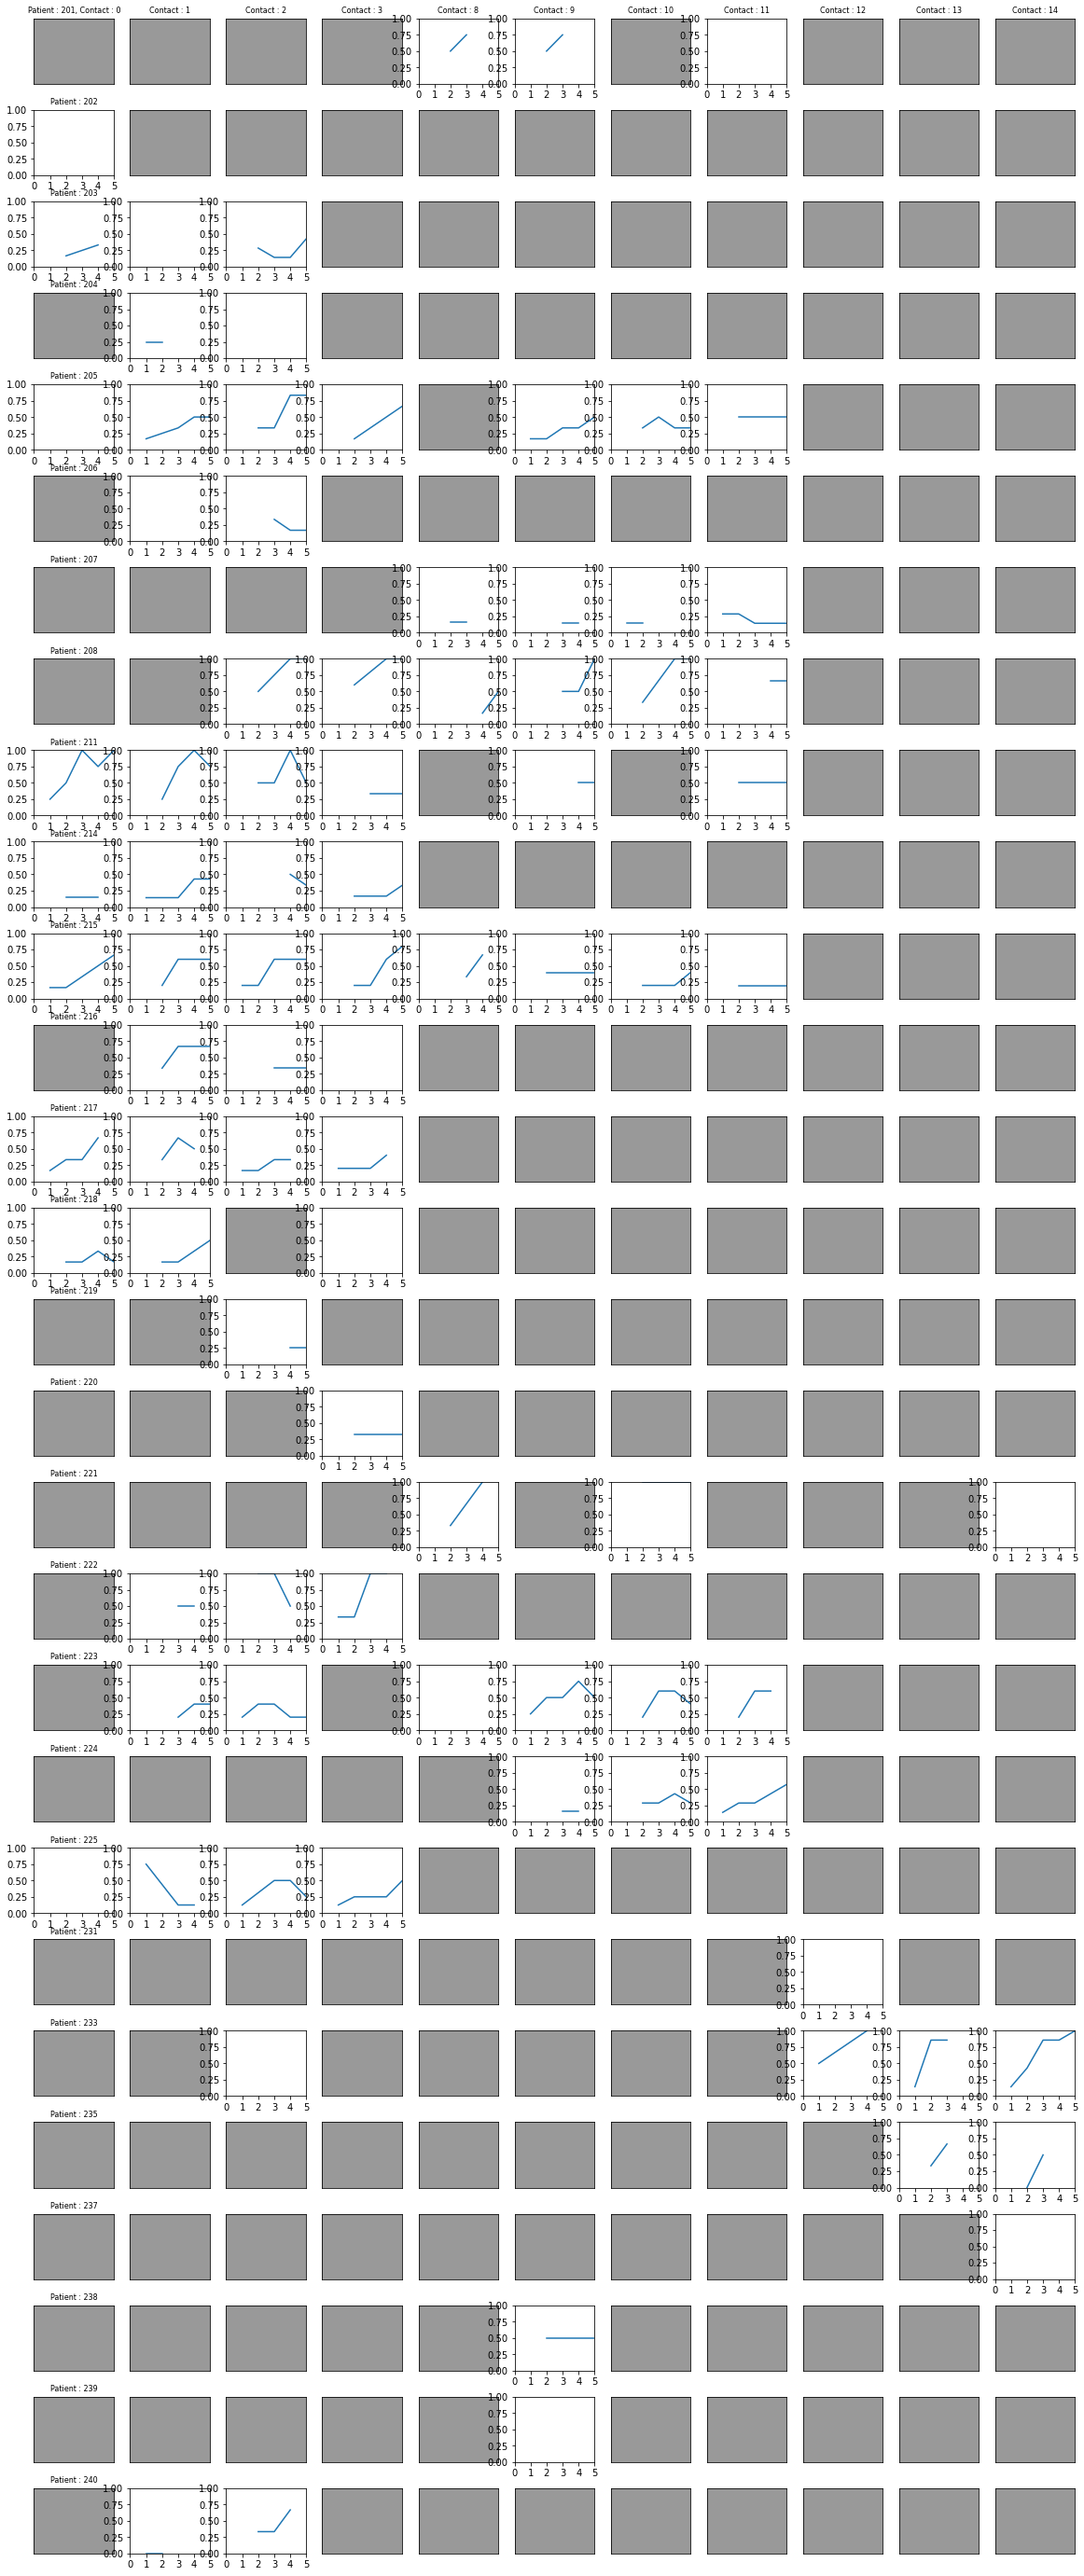

In [126]:
fig, axs = plt.subplots(figsize=(20,50), 
                        nrows=len(unique_patients), 
                        ncols=len(unique_contacts),   
                        gridspec_kw=dict(hspace=0.4))
keys = df_1.groups.keys()

for i, patient in enumerate(unique_patients):
    for j, contact in enumerate(unique_contacts):
        key = (patient, contact)
        if key in keys:
            axs[i,j].plot(
            df_1.get_group(key)['amplitude'],
            df_1.get_group(key)['clinicalScore'])

            axs[i,j].set_xticks(np.arange(0, 6, 1.0))
            axs[i,j].set_yticks(np.arange(0, 1.25, 0.25))
        else :
            axs[i,j].set_facecolor((0.6, 0.6, 0.6))
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        title = ''
        if j == 0:
            title += f'Patient : {key[0]}'
        if i == 0:
            title += f'Contact : {key[1]}' if j != 0 else f', Contact : {key[1]}'
        axs[i,j].set_title(title, size=8)
        axs[i,j].set_ylim([0.0, 1.0])
        axs[i,j].set_xlim([0.0, 5.0])
        
ax.legend()
plt.show()


In [7]:
table['hemisphere'].value_counts()

left     1911
right    1659
Name: hemisphere, dtype: int64

## Clinical scores for mapping + augmented dataset

In [6]:
mapping

,centerID,patientID,hemisphere,contactID,relativeImprovement,amplitude,efficiency,filename,mapping
0,1,1,left,8,0.5,2.5,0.200000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
1,1,1,left,9,1.0,2.5,0.400000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
2,1,1,left,10,1.0,3.5,0.285714,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
3,1,1,left,11,1.0,3.0,0.333333,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
4,1,1,left,12,1.0,2.5,0.400000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
...,...,...,...,...,...,...,...,...,...
655,1,183,right,3,1.0,1.5,0.666667,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
656,1,183,right,4,1.0,1.5,0.666667,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
657,1,183,right,6,1.0,1.0,1.000000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1
658,1,183,left,18,1.0,2.0,0.500000,/home/brainstimmaps/RESEARCH/20xx_Projects/200...,1


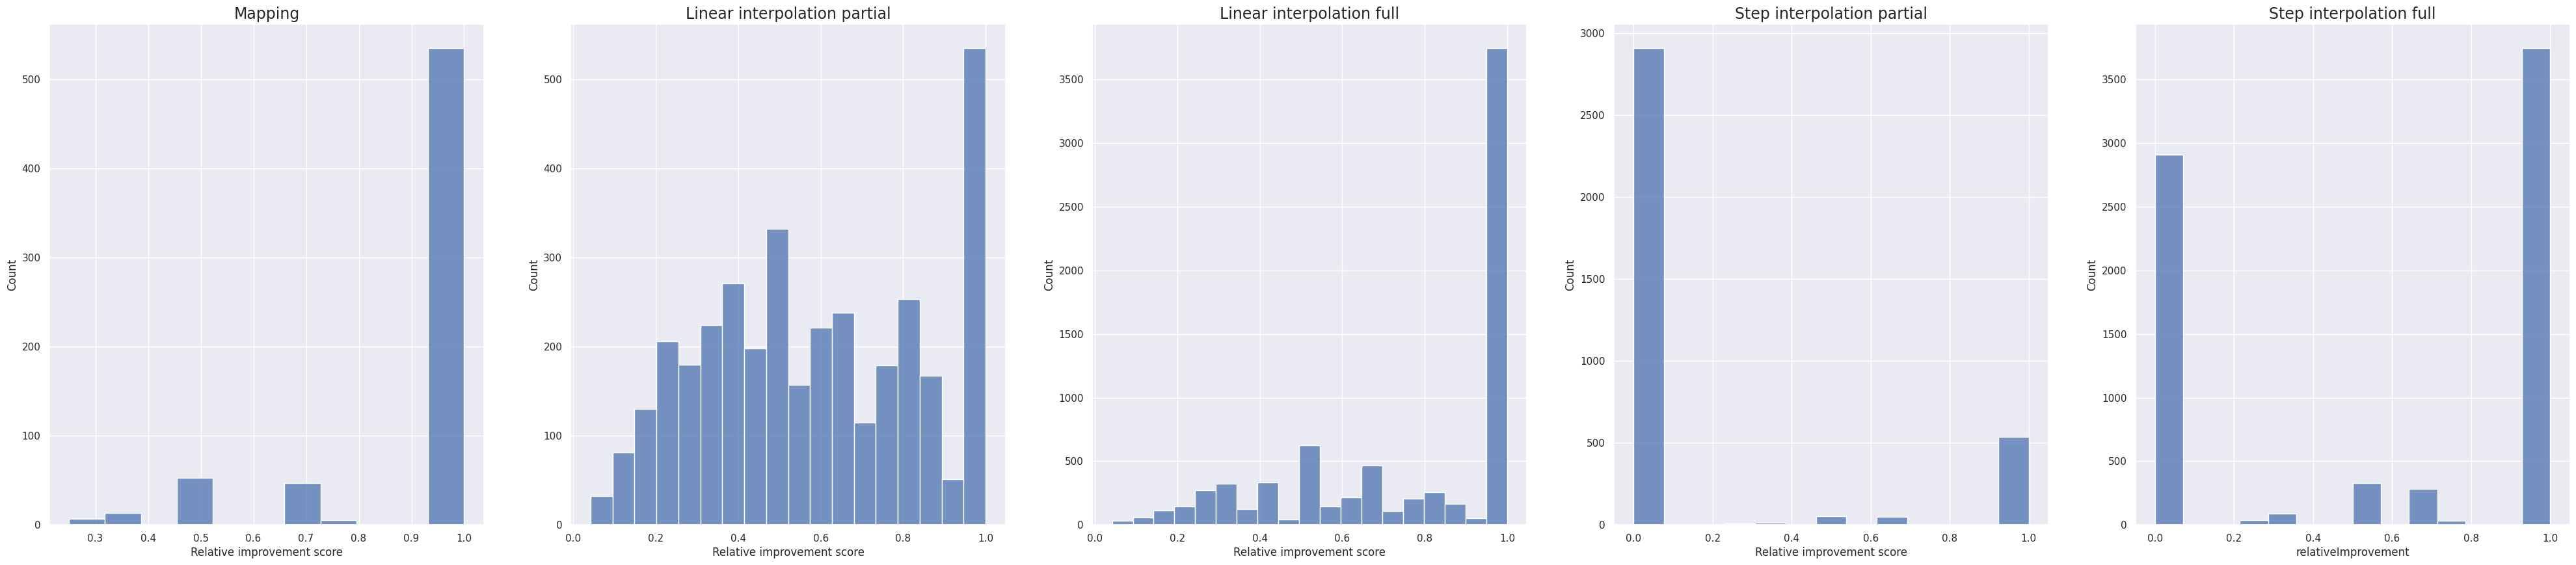

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

fig, ax = plt.subplots(figsize=(50,10), 
                        nrows=1, 
                        ncols=5)
for i in range(4):
    ax[i].set_xlabel("Relative improvement score")
ax[0].set_title("Mapping", fontdict={'fontsize' : 17})
sns.histplot(data=mapping, x='relativeImprovement', ax=ax[0])
ax[1].set_title("Linear interpolation partial", fontdict={'fontsize' : 17})
sns.histplot(data=lin_part, x='relativeImprovement', ax=ax[1])
ax[2].set_title("Linear interpolation full", fontdict={'fontsize' : 17})
sns.histplot(data=lin_full, x='relativeImprovement', ax=ax[2])
ax[3].set_title("Step interpolation partial", fontdict={'fontsize' : 17})
sns.histplot(data=step_part, x='relativeImprovement', ax=ax[3])
ax[4].set_title("Step interpolation full", fontdict={'fontsize' : 17})
sns.histplot(data=step_full, x='relativeImprovement', ax=ax[4])
plt.show()

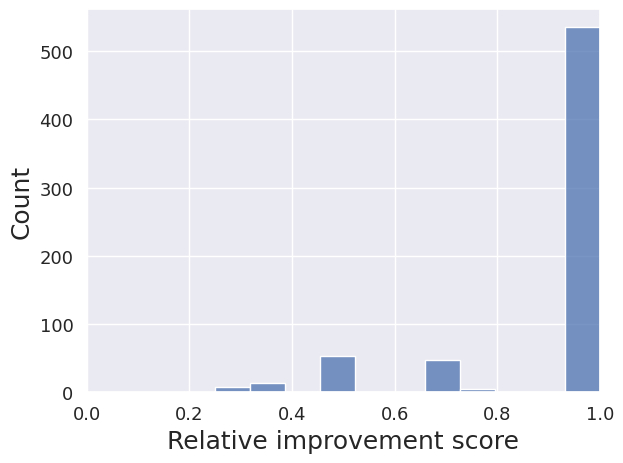

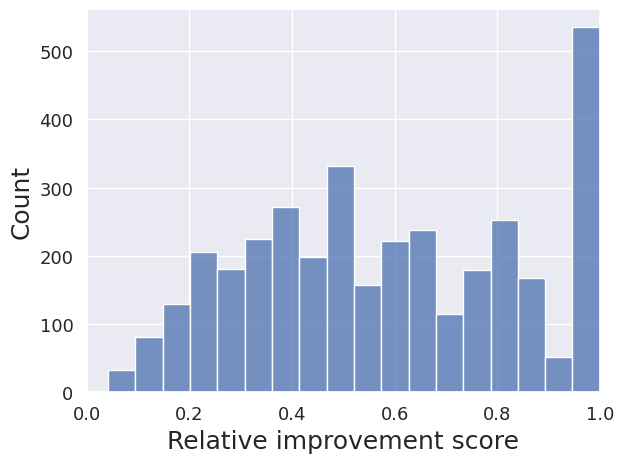

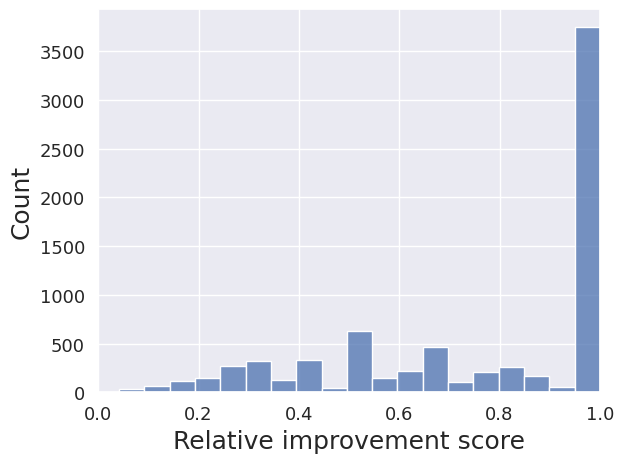

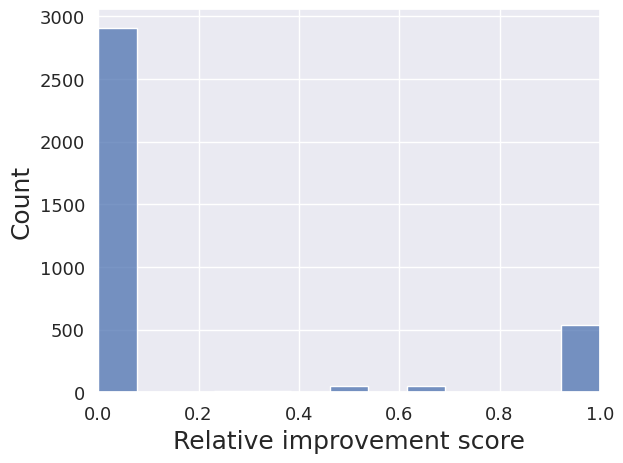

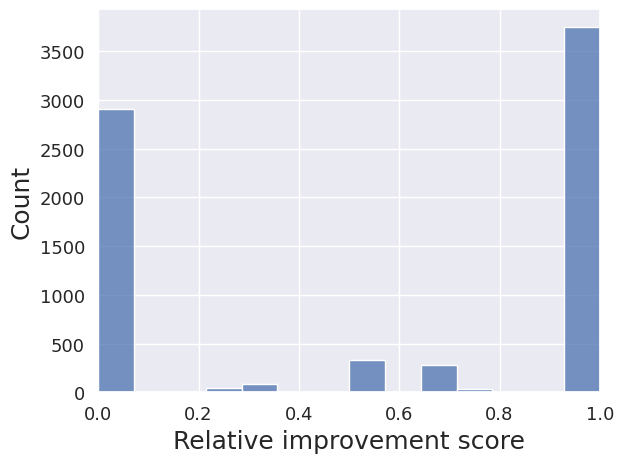

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


for i,j in zip((mapping, lin_part, lin_full, step_part, step_full),('mapping', 'lin_part', 'lin_full', 'step_part', 'step_full')):
    fig, ax = plt.subplots()
    ax.set_xlabel("Relative improvement score", fontdict={'fontsize' : 18})
    ax.set_ylabel("Count", fontdict={'fontsize' : 18})
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.set_xlim(0., 1.0)
    #ax.set_title("Mapping", fontdict={'fontsize' : 17})
    sns.histplot(data=i, x='relativeImprovement', ax=ax)
    plt.tight_layout()
    figure_path = '/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/notebooks/tables/plots/'
    plt.savefig(figure_path + f'{j}.png')
    plt.show()

In [4]:
new_t = pd.read_csv('/media/brainstimmaps/DATA/2009_DeepMaps01/04_Source/01_Development/deepmaps/data/raw/psm_tables/bern+cologne/mapping/multicentricTableBernCologneImprovedOnlyRev05.csv')


In [5]:
new_t

,centerID,leadID,contactID,relativeImprovement,amplitude,efficiency,filename
0,1,1.5,8,0.500000,2.5,0.200000,../../03_Data/VTAsForMulticentricPSMRev05/Bern...
1,1,1.5,9,1.000000,2.5,0.400000,../../03_Data/VTAsForMulticentricPSMRev05/Bern...
2,1,1.5,10,1.000000,3.5,0.285714,../../03_Data/VTAsForMulticentricPSMRev05/Bern...
3,1,1.5,11,1.000000,3.0,0.333333,../../03_Data/VTAsForMulticentricPSMRev05/Bern...
4,1,1.5,12,1.000000,2.5,0.400000,../../03_Data/VTAsForMulticentricPSMRev05/Bern...
...,...,...,...,...,...,...,...
1006,2,240.0,3,0.500000,3.0,0.166667,../../03_Data/VTAsForMulticentricPSMRev04B/Col...
1007,2,240.0,3,0.500000,4.0,0.125000,../../03_Data/VTAsForMulticentricPSMRev04B/Col...
1008,2,240.0,2,0.333333,2.0,0.166667,../../03_Data/VTAsForMulticentricPSMRev04B/Col...
1009,2,240.0,2,0.333333,3.0,0.111111,../../03_Data/VTAsForMulticentricPSMRev04B/Col...


In [9]:
new_t['centerID'].value_counts()

1    660
2    351
Name: centerID, dtype: int64